<a href="https://colab.research.google.com/github/kayopro/RoteiroRefactoringJS/blob/main/Classifica%C3%A7%C3%A3o_KNN_Base_de_dados_%C3%8Dris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Número de amostras e características: (150, 5)
Nomes das características: Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')
Nomes das classes: ['setosa' 'versicolor' 'virginica']


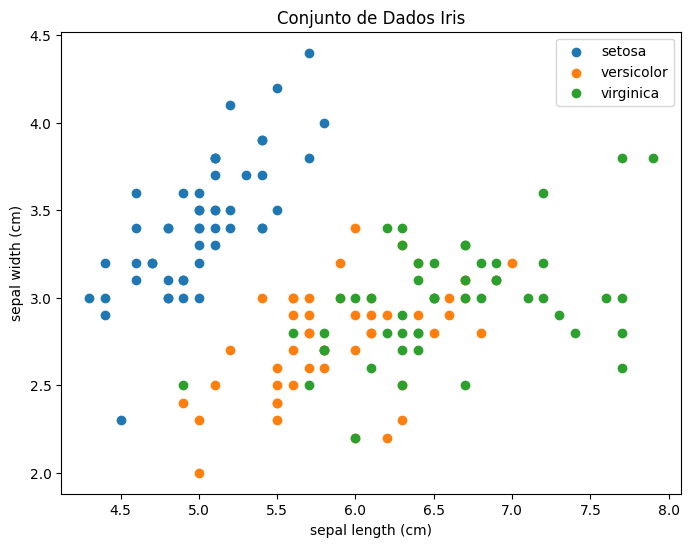

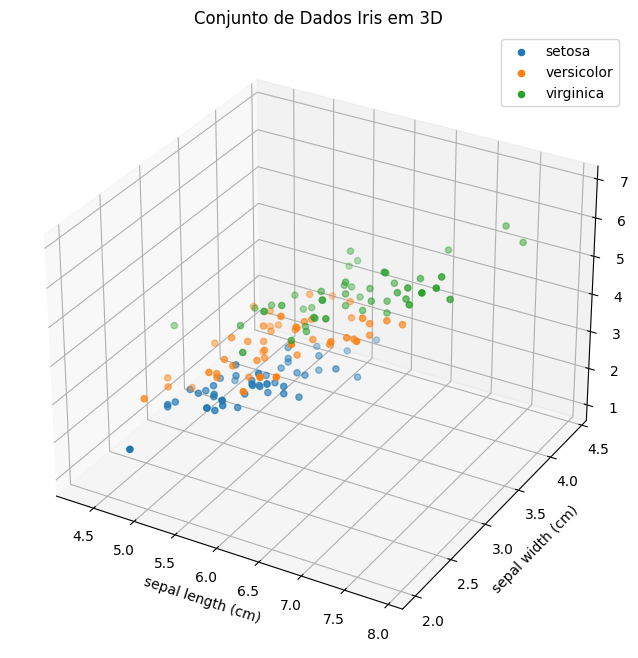

Acurácia do modelo: 1.0

Relatório de classificação:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Parabéns! Você treinou com sucesso um modelo KNN para classificação de dados usando o conjunto de dados Iris.
Você pode experimentar com diferentes valores de k e explorar outros conjuntos de dados para aprender mais sobre aprendizado de máquina.


In [ ]:
# Importar bibliotecas necessárias
import numpy as np  # Biblioteca para manipulação de arrays e funções matemáticas
import pandas as pd  # Biblioteca para manipulação e análise de dados em formato tabular
from sklearn.datasets import load_iris  # Função para carregar o conjunto de dados Iris
from sklearn.model_selection import train_test_split  # Função para dividir os dados em conjuntos de treinamento e teste
from sklearn.preprocessing import StandardScaler  # Função para normalizar os dados
from sklearn.neighbors import KNeighborsClassifier  # Classe para o modelo KNN
from sklearn.metrics import accuracy_score, classification_report  # Funções para avaliar o modelo
import matplotlib.pyplot as plt  # Biblioteca para plotagem de gráficos
from mpl_toolkits.mplot3d import Axes3D  # Para plotagem 3D

# Carregar e entender o conjunto de dados Iris
iris = load_iris()  # Carrega o conjunto de dados Iris
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)  # Cria um DataFrame Pandas com os dados do conjunto Iris
data['target'] = iris.target  # Adiciona os rótulos (target) ao DataFrame

# Exibir informações básicas sobre o conjunto de dados
print("Número de amostras e características:", data.shape)  # Mostra o número de amostras e características (colunas)
print("Nomes das características:", data.columns[:-1])  # Mostra os nomes das características (exceto o rótulo/target)
print("Nomes das classes:", iris.target_names)  # Mostra os nomes das classes possíveis no conjunto de dados

# Plotar os dados do conjunto Iris em 2D
plt.figure(figsize=(8, 6))  # Define o tamanho da figura
for i in range(len(iris.target_names)):
    plt.scatter(data[data['target'] == i][iris.feature_names[0]], data[data['target'] == i][iris.feature_names[1]], label=iris.target_names[i])  # Plota os pontos de cada classe

plt.title("Conjunto de Dados Iris")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend(loc='best')
plt.show()

# Plotar os dados do conjunto Iris em 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for i in range(len(iris.target_names)):
    ax.scatter(data[data['target'] == i][iris.feature_names[0]], data[data['target'] == i][iris.feature_names[1]], data[data['target'] == i][iris.feature_names[2]], label=iris.target_names[i])

ax.set_xlabel(iris.feature_names[0])
ax.set_ylabel(iris.feature_names[1])
ax.set_zlabel(iris.feature_names[2])
ax.set_title("Conjunto de Dados Iris em 3D")
plt.legend(loc='best')
plt.show()

# Dividir os dados em conjuntos de treinamento e teste
X = data.iloc[:, :-1]  # Features (características) são todas as colunas exceto a última
y = data['target']  # Rótulos (targets) são a última coluna

# Dividir os dados em conjuntos de treinamento e teste (80% treinamento, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Divide os dados aleatoriamente em conjuntos de treinamento e teste

# Normalizar os dados (importante para o KNN)
scaler = StandardScaler()  # Inicializa o objeto de normalização
X_train_scaled = scaler.fit_transform(X_train)  # Normaliza os dados de treinamento
X_test_scaled = scaler.transform(X_test)  # Normaliza os dados de teste usando os parâmetros de treinamento

# Treinar o modelo KNN
k = 3  # Número de vizinhos
knn = KNeighborsClassifier(n_neighbors=k)  # Inicializa o modelo KNN com o número de vizinhos especificado

# Treinar o modelo
knn.fit(X_train_scaled, y_train)  # Treina o modelo KNN com os dados de treinamento normalizados

# Avaliar o modelo
y_pred = knn.predict(X_test_scaled)  # Faz previsões no conjunto de teste

# Calcular a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)  # Calcula a acurácia comparando as previsões com os rótulos verdadeiros
print("Acurácia do modelo:", accuracy)

# Exibir o relatório de classificação
print("\nRelatório de classificação:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))  # Imprime um relatório detalhado com métricas de avaliação

# Conclusão e próximos passos
print("\nParabéns! Você treinou com sucesso um modelo KNN para classificação de dados usando o conjunto de dados Iris.")
print("Você pode experimentar com diferentes valores de k e explorar outros conjuntos de dados para aprender mais sobre aprendizado de máquina.")